# Linear Regression
In this task, first of all, we have to create a function that generates 100 random points on the plane. Second we have to run both pocket and linear regression algorithm to get weights. Third, we need to test the performance of both algorithms. 
To do that, we have to use minimization square root error, which is

$\underset{w}{min}\sum\limits_{n=1}^N[y_{n}-(w^{T}x_{n})]^2$




In [0]:
#Python libraries we need to use
import numpy as np
import matplotlib.pyplot as plt
import random

In [0]:
# Creating a dataset
def dataset(size):
  d = 2
  w = np.random.randint(1,10,d)
  b = np.random.randint(1,10) 
  x = np.random.uniform(-1,1,(size,d))*10
  y = np.zeros(20)
  #making a hypothesis line
  h = x.dot(w) + b
  labels = (h > 0)*1
  flipping = np.random.randint(size, size=10)
  #flipping indexes of randomly chosen 10 points N/10
  for f in flipping:
    if (labels[f] == 1):
      labels[f] = 0
    else:
      labels[f] = 1
  y = labels
  return x, y, w, b

In [0]:
def finding_err(x, w, y):
    err = 0.0
    for i in range(len(x)):
        ypred = np.dot(x[i],w)
        if(ypred > 0 and y[i] == -1): 
            err += 1
        elif(ypred <= 0 and y[i] == 1): 
            err += 1
    mean = err/x.size 
    return mean

In [0]:
def pocket(x, y, w, iters): 
    
    #updates
    num_updates = [] 
    updates = 0
    E = []
    E_val=0.0
    
    #iterations
    for it in range (iters):
        
        y_wrong = [] #saves indeces of the wrong predicted y
        predict=[]
        
        for i in range(len(x)):
            
            if np.dot(x[i],w)>0:
                predict.append(1)
            else: predict.append(0)
            
            if predict[i] != y[i]:
                y_wrong.append(i)
                
        #randomly choose the index of wrong classified x
        pick = np.random.randint(len(y_wrong)) 
        
        #new weight
        weight = w + (y[pick]-predict[pick]) * x[pick]

        E_old = finding_err(x, w, y)
        E_new = finding_err(x, weight, y)

        if (E_new < E_old): #compare old and new Error

            E.append(E_new) 
            num_updates.append(updates)
            updates += 1
            w = np.copy(weight) #update weight to new weight
            E_val=E_new
    return w

In [0]:
def linear_reg(x, y):
  y_new = y.reshape(len(y), 1)
  inverse = np.linalg.inv(np.dot(x.T, x))
  inv_x = np.dot(inverse, x.T)
  w_lin = np.dot(inv_x, y_new)
  return w_lin

In [0]:
#Generating dataset with random 100 points
x_train, y_train, x_test, y_test = dataset(100)

In [0]:
#Running pocket algorithm
w = np.zeros(2)
T = 1000
w_poc = pocket(x_train, y_train, w, T)

In [8]:
w_lin=linear_reg(x_train, y_train)
print ('Weights: ',w_lin)

Weights:  [[0.02486019]
 [0.04194516]]


In [9]:
#Generating test dataset with 1000 points
x_test, y_test, w_test, b_test=dataset(1000)

E_pocket=finding_err(x_test, w_poc, y_test)
E_pocket

0.0575

In [10]:
E_lin=finding_err(x_test, w_lin, y_test)
E_lin

0.041

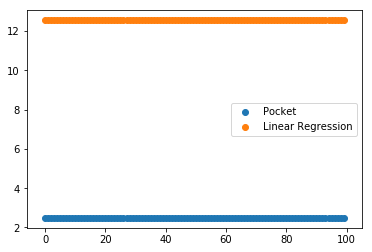

In [11]:
#New experiment
x_new, y_new, w_new, b_new = dataset(1000)

E_poc_new = np.zeros(100)
E_lin_new = np.zeros(100)
w_new = np.zeros(3)
n = np.zeros(100)

for i in range (100):
    
    E_poc_new[i]=finding_err(x_new, w_poc, y_new)
    E_lin_new[i]=finding_err(x_new, w_lin, y_test)
    
    n[i]=i
    
plt.scatter(n,E_poc_new*100, label='Pocket')
plt.scatter(n,E_lin_new*100, label="Linear Regression")
plt.legend()
plt.show()

From the above experiment we can clearly see that Pocket algorithm acts much better Linear Regression.
However, linear regression works faster than pocket. Anyway both pocket and linear regression give small errors

# Logistic Regression

In [0]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import random
iris = load_iris()

In [0]:
def train_test_split(data):
    x = iris.data
    y = iris.target
    
    # random sampling
    size = int(0.8*x.shape[0]) 
    train = random.sample(range(0,150),120)
    x_train = x[train]
    y_train = y[train]
    
    #get test by substracting train
    test = list(set(range(0,150))-set(train)) 
    x_test = x[test]
    y_test = y[test]

    return x_train, y_train, x_test, y_test

In [0]:
x_train, y_train, x_test, y_test = train_test_split(iris)

In [15]:
train_samp, d = x_train.shape
test_samp = x_test.shape[0]

train = random.sample(range(0,120),120)
test = random.sample(range(0,30),30)

#iters = 2000
#iters = 0.001
iters = 50
lr = 0.0001

weights = np.zeros(d+1)

E_in = []
E_test = []

for it in range(iters):
    E_ins = 0
    for i in train:
        ex_train = np.append(x_train[i],1)
        cross_entropy_err = np.log(1+np.exp(-y_train[i]*2*np.dot(weights.T, ex_train)))
        weights = weights + lr * cross_entropy_err
        
        E_ins += cross_entropy_err
    E_in_ave = E_ins / train_samp
    E_in.append(E_in_ave)
    
    E_tests = 0
    for i in test:
        ex_test = np.append(x_test[i],1)
        cross_entropy_err = np.log(1+np.exp(-y_test[i]*2*np.dot(weights.T, ex_test)))
        
        E_tests += cross_entropy_err
    E_test_ave = E_tests / test_samp
    E_test.append(E_test_ave)
    
    print("EPOCH %d:\tTrain error: %f\t\tTest error: %f" % (it+1, E_in_ave, E_test_ave))

EPOCH 1:	Train error: 0.634817		Test error: 0.582305
EPOCH 2:	Train error: 0.537485		Test error: 0.512243
EPOCH 3:	Train error: 0.471527		Test error: 0.466054
EPOCH 4:	Train error: 0.424705		Test error: 0.434350
EPOCH 5:	Train error: 0.390075		Test error: 0.411796
EPOCH 6:	Train error: 0.363558		Test error: 0.395247
EPOCH 7:	Train error: 0.342659		Test error: 0.382777
EPOCH 8:	Train error: 0.325793		Test error: 0.373162
EPOCH 9:	Train error: 0.311910		Test error: 0.365602
EPOCH 10:	Train error: 0.300297		Test error: 0.359553
EPOCH 11:	Train error: 0.290448		Test error: 0.354641
EPOCH 12:	Train error: 0.281999		Test error: 0.350599
EPOCH 13:	Train error: 0.274682		Test error: 0.347234
EPOCH 14:	Train error: 0.268293		Test error: 0.344404
EPOCH 15:	Train error: 0.262675		Test error: 0.342002
EPOCH 16:	Train error: 0.257705		Test error: 0.339945
EPOCH 17:	Train error: 0.253286		Test error: 0.338173
EPOCH 18:	Train error: 0.249338		Test error: 0.336635
EPOCH 19:	Train error: 0.245798		Test

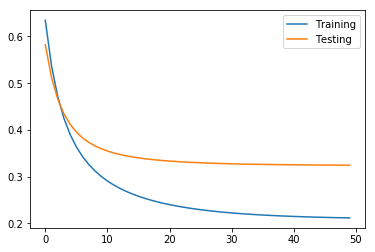

In [16]:
plt.plot(range(iters), E_in, label='Training')
plt.plot(range(iters), E_test, label='Testing')
plt.legend()
plt.show()

At T = 2000 and learning rate = 0.001 give awful results in our graph.
In order to mitigate these values, learning rate = 0.0001 and T = 50, So that number of iterations and learning rate must decrease. Decreasing learning rate makes Logistic regression work slower, however, accuracy is much better. 

# Practical design of a learning algorithm

In [17]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [0]:
x = digits.data
y = digits.target

In [0]:
def finding_linerr(x, w, y):
    err = np.dot(y.T,y)-2*np.dot(w.T, np.dot(x.T,y))+np.dot(np.dot(w.T, x.T), np.dot(x,w))
    return err

In [0]:
def lin_reg(x_train, x_test, y_train, y_test):
    w = np.linalg.pinv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)   
    return finding_linerr(x_test, w, y_test)

In [0]:
def log_reg(x_train, x_test, y_train, y_test):
    train_samp, d = x_train.shape
    test_samp = x_test.shape[0]

    train = random.sample(range(0,120),120)
    test = random.sample(range(0,30),30)

    #iters = 2000
    #iters = 0.001
    iters = 50
    lr = 0.0001

    weights = np.zeros(d+1)

    E_in = []
    E_test = []
    
    for it in range(iters):
        E_ins = 0
        for i in train:
          ex_train = np.append(x_train[i],1)
          cross_entropy_err = np.log(1+np.exp(-y_train[i]*2*np.dot(weights.T, ex_train)))
          weights = weights + lr * cross_entropy_err
        
          E_ins += cross_entropy_err
        E_in_ave = E_ins / train_samp
        E_in.append(E_in_ave)
      
        E_tests = 0
        for i in test:
          ex_test = np.append(x_test[i],1)
          cross_entropy_err = np.log(1+np.exp(-y_test[i]*2*np.dot(weights.T, ex_test)))
        
        E_tests += cross_entropy_err
        E_test_ave = E_tests / test_samp
        E_test.append(E_test_ave)

    return E_test_ave

In [0]:
def spliting(x, y, folds):
    #size
    size = int(x.shape[0] / folds)
    folds_dict = {}
    x_list = []
    y_list = []
    
    #iteration via each fold
    for i in range(folds-1):
        x_fold = x[size*i : size*i+size]
        y_fold = y[size*i : size*i+size]
        x_list.append(x_fold)
        y_list.append(y_fold)
   
    #the data that left
    x_fold = x[size*(folds-1):]
    y_fold = y[size*(folds-1):]
    x_list.append(x_fold)
    y_list.append(y_fold)
    
    folds_dict['x'] = x_list
    folds_dict['y'] = y_list
    
    return folds_dict

In [0]:
def estimate_lin_log(folds):
  x_folds = np.array(folds['x'])
  y_folds = np.array(folds['y'])

  E_linear = []
  E_logistic = []

  for num in range(len(folds['x'])):
      x_test = x_folds[num]
      y_test = y_folds[num]

      x_temp = np.delete(x_folds, num)
      y_temp = np.delete(y_folds, num)

      x_train = np.concatenate([x_temp[0]])
      for i in range(1,len(x_temp)):
          x_train = np.concatenate([x_train, x_temp[i]])

      y_train = np.concatenate([y_temp[0]])
      for i in range(1,len(y_temp)):
          y_train = np.concatenate([y_train, y_temp[i]])
        
      E_lin = lin_reg(x_train, x_test, y_train, y_test)
      E_linear.append(E_lin)
    
      E_log = log_reg(x_train, x_test, y_train, y_test)
      E_logistic.append(E_log)
      
  
      return E_linear, E_logistic

In [24]:
#10 folds cross validation
folds = spliting(x, y, 10)
estimate = estimate_lin_log(folds)
estimate

([962.5138101227963], [0.003872330617653326])

As we can see from the values of linear and logistic, logistic regression acts much better, and its error value near to 0 while Linear Regression shows much higher value almost 1000

In [25]:
#5 fold cross validation
folds = spliting(x, y, 5)
estimate = estimate_lin_log(folds)
estimate

([1574.5211666107234], [4.194725656268603e-15])

In [26]:
#20 fold cross validation
folds = spliting(x, y, 20)
estimate = estimate_lin_log(folds)
estimate

([393.75064930675194], [0.0])

In [27]:
#1 fold cross validation
folds = spliting(x, y, 2)
estimate = estimate_lin_log(folds)
estimate

([3619.467132699672], [0.0])

As we can see, changing the number of folds are changes the errors of linear regression, however logistic regression stays same with 0.